# COMPREHENSIVE DATA EXPLORATION

mainly from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# First: analysing 'SalePrice'

In [7]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

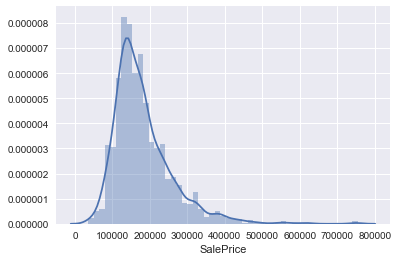

In [8]:
#histogram
sns.distplot(df_train['SalePrice']);

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship between 'SalePrice' and other variables

## numerical variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


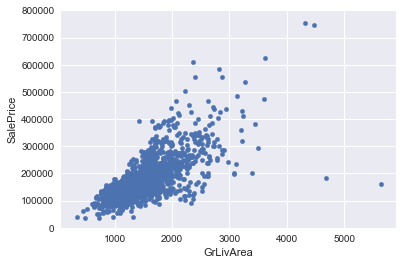

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'     # Above grade (ground) living area square feet
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

This shows a <b>linear relationship.</b>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


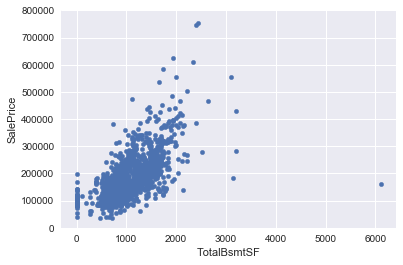

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'        # Total square feet of basement area
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

This seems a <b>linear or exponential</b> relationship.

## Relationship with categorical features

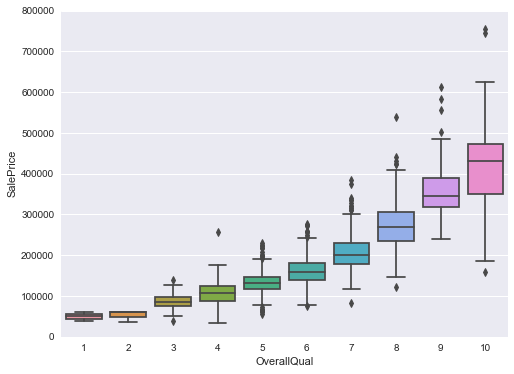

In [13]:
#box plot overallqual/saleprice
var = 'OverallQual'           # Rates the overall material and finish of the house (1-10)
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

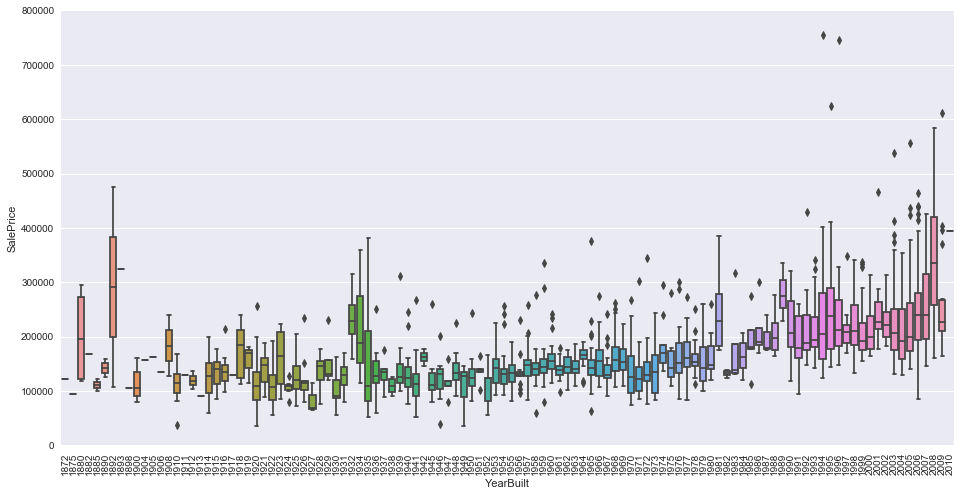

In [14]:
var = 'YearBuilt'          # Original construction date Year
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

# Some useful measures

## Correlation matrix (heatmap style)

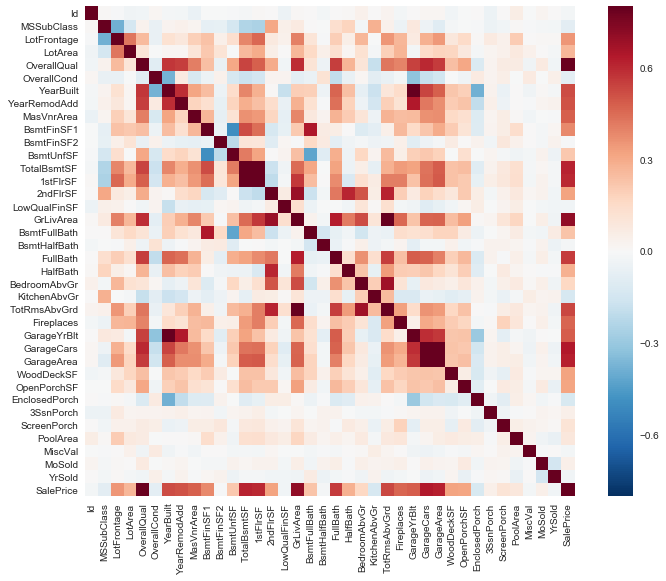

In [15]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 


- Another thing was the 'SalePrice' correlations. We can see many variables have high correlation such as 'GrLivArea', 'TotalBsmtSF', and 'OverallQual'. 

## 'SalePrice' correlation matrix (zoomed heatmap style)

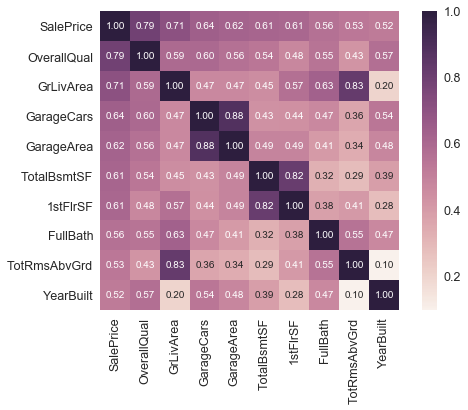

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)         # fill in the numbers
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'GarageCars' and 'GarageArea' are some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. To avoid multicollinearity, we can keep 'GarageCars' since its correlation with 'SalePrice' is higher.

* We can also find other pairs with high correlation. 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. 

## Scatter plots between correlated variables

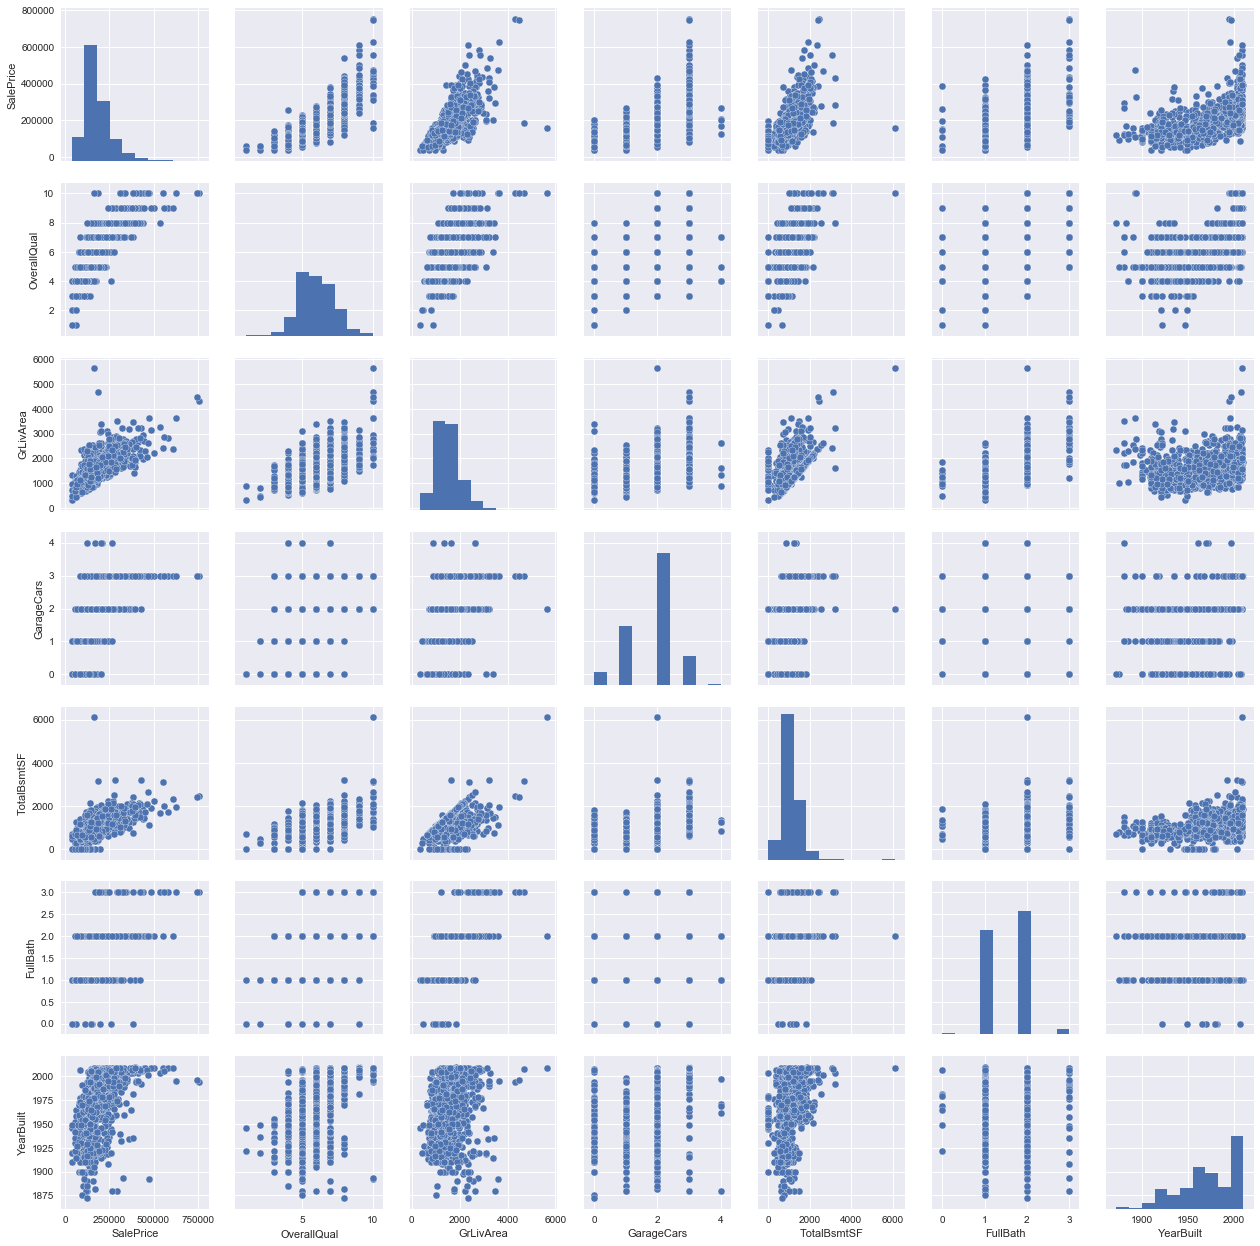

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Missing data

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [18]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- When more than a threshold (eg. 15%) of the data is missing, we should delete the corresponding variable and pretend it never existed. 


- Will we miss this data? I don't think so. 
    - 1. None of these variables have high correlation with salesprice. 
    - 2. Usually, we don't think about them when buying a house (maybe that's the reason why data is missing). 
    - 3. Variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' have a lot outliers.
    - 4. If we want to explore more on them, we may need deeper algorithms to reduce noise and fill in data.


- We can see that 'Garage*X*' variables have the same number of missing data. Since the most important information regarding garages is expressed by 'GarageCars', we can delete the 'Garage*X*' variables with too many missing values.

In [19]:
#delete columns or rows with missing data
df_train_missing = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train_missing = df_train_missing.drop(df_train_missing.loc[df_train_missing['Electrical'].isnull()].index)
df_train_missing.isnull().sum().max()   #just checking that there's no missing data missing...

0

# Outliers

Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

## Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [20]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


## Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


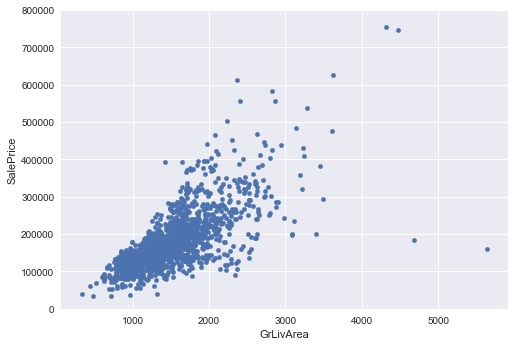

In [21]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. Maybe they refer to agricultural area and that could explain the low price. We'll define them as outliers and delete them.

In [25]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [26]:
#deleting points
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


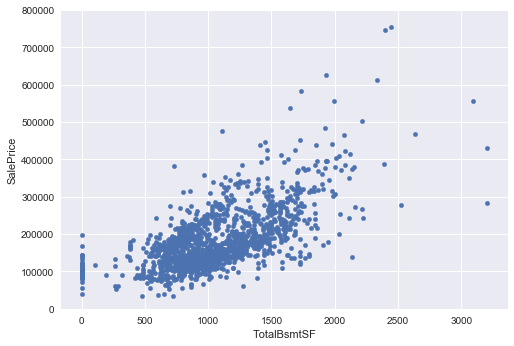

In [27]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Normalization

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

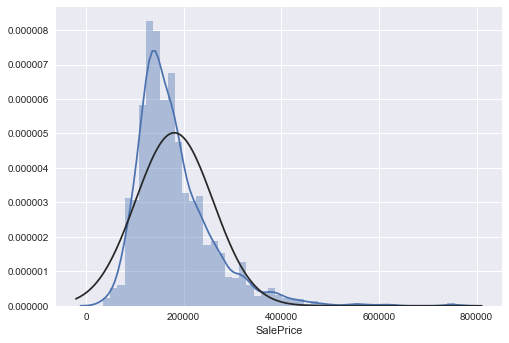

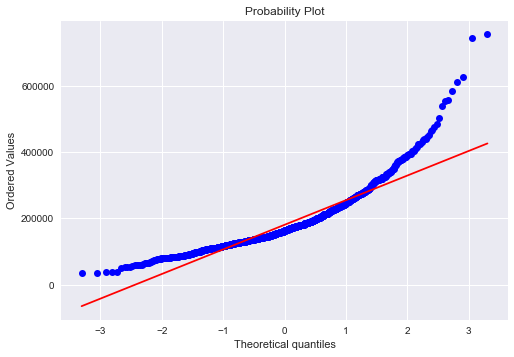

In [28]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [29]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

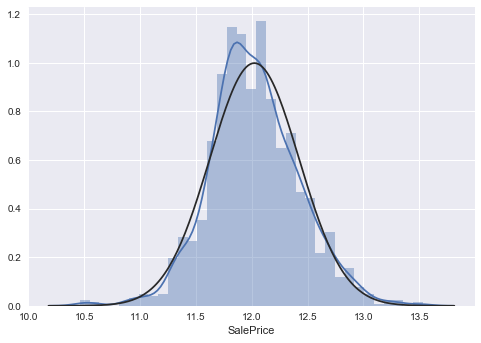

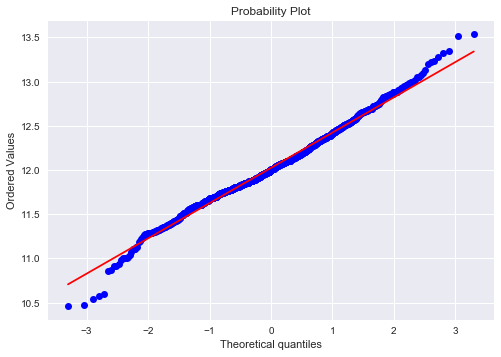

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Let's check what's going on with 'GrLivArea'.

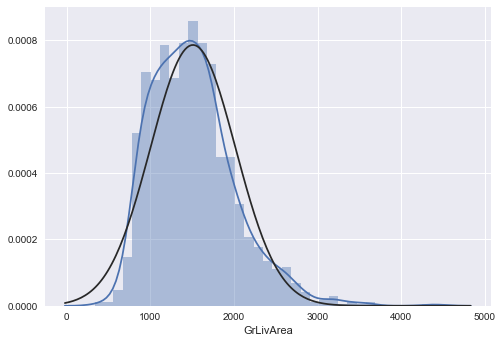

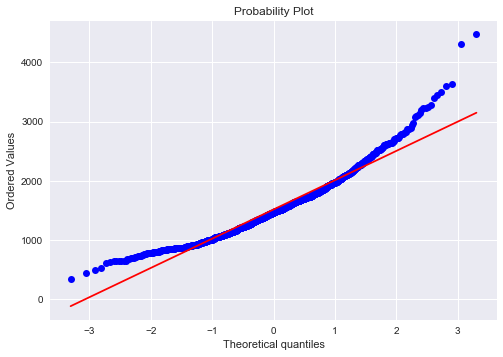

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [32]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

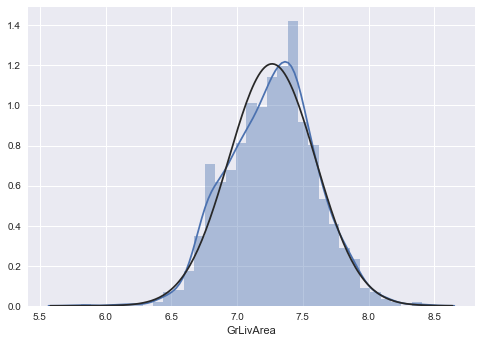

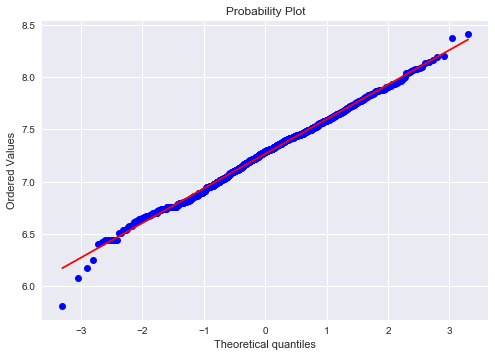

In [33]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

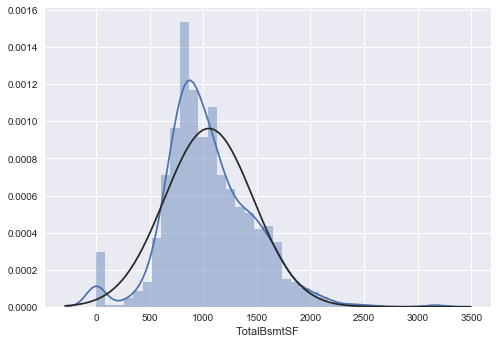

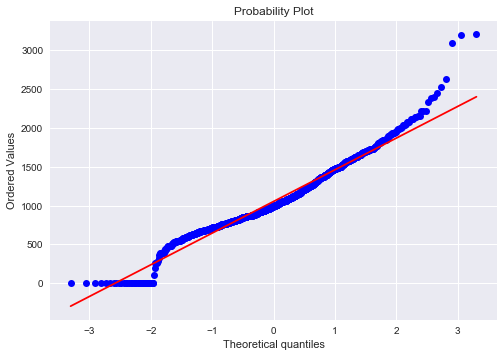

In [34]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Now we have many troubles.

* 1. Something that, in general, presents skewness.
* 2. A significant number of observations with value zero (houses without basement).
* 3. A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 

In [35]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train['HasBsmt'].value_counts()

1    1421
0      37
Name: HasBsmt, dtype: int64

In [36]:
#transform data with non-zero observations
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

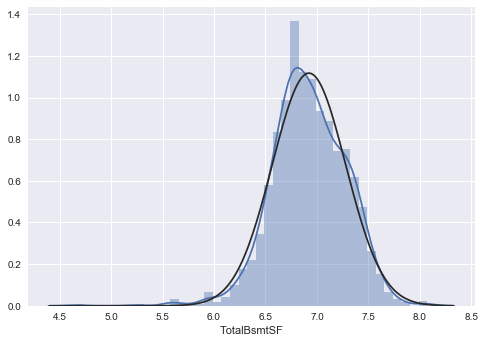

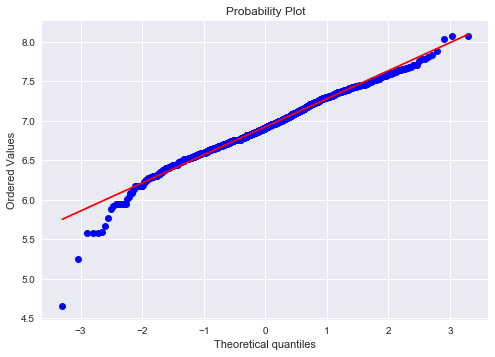

In [37]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

- Still some outliers, we can delete some observations if we want.

After the log transformation, we can draw scatter plots to see the improvements.

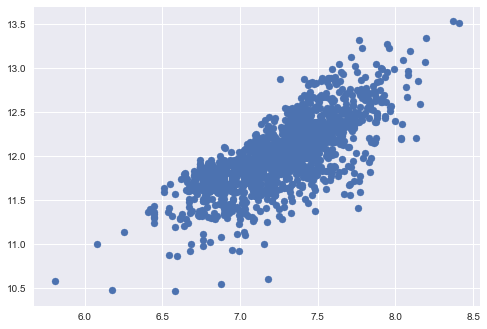

In [38]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

# Dummy variables (One hot encoding)

In [39]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [48]:
# data type conversion
df_train['MSSubClass']=df_train['MSSubClass'].astype(str)
df_train['MSSubClass'].value_counts()

20     536
60     297
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [49]:
df_train=df_train.join(pd.get_dummies(df_train['MSSubClass'],prefix='MSSubClass'))
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,0,0


# Test our ideas

We can't see test data in advance in real life, so we should transform train and test set in the same way.

In [56]:
#get whole set for transforming
df_train1 = pd.read_csv('train.csv')
df_test1= pd.read_csv('test.csv')

y_train=df_train1['SalePrice']
X_train=df_train1.drop(['SalePrice'],axis=1)
X_test= df_test1
df_all=pd.concat((X_train,X_test),axis=0)

For simplicity, we only use xgboost as our model. We only change one important parameter "max_depth" to find optimal value. 


Since Kaggle don't provide test results, we'll use cross validation score on train set to evaluate our model.

In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def simple_test(X_train,y_train,params=[1,3,5]):
    test_scores=[]
    for para in params:
        clf=XGBRegressor(max_depth=para)
        test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
        test_scores.append(np.mean(test_score))

    plt.plot(params,test_scores)

## Only one hot encoding

1 loop, best of 3: 20.4 s per loop


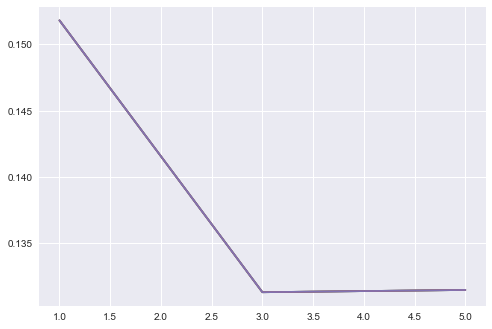

In [85]:
%%timeit
X_train_base = pd.get_dummies(X_train)
y_train_log=np.log1p(y_train)
simple_test(X_train_base,y_train_log)

## Dealing with missing data

In [82]:
def delete_missing(df):
    df_train=df.copy()
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    df_train= df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)

    return df_train

1 loop, best of 3: 19.5 s per loop


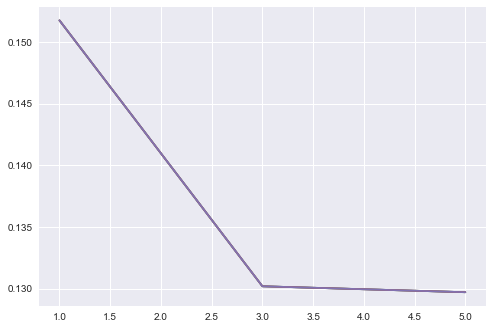

In [86]:
%%timeit
X_train_delete=delete_missing(X_train_base)
simple_test(X_train_delete,y_train_log)

## Remove outliers

- 1. remove observations if the value is too high or too low in a single feature.
- 2. remove observations according to the scatter plot from two features.

In [123]:
def remove_outliers(X_train,y_train):
    df_train=X_train.copy()
    df_y=y_train.copy()
    outlier_id=df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
    for i in list(outlier_id.index):
        df_train = df_train.drop(i)
        df_y= df_y.drop(i)
    return df_train, df_y

1 loop, best of 3: 19.4 s per loop


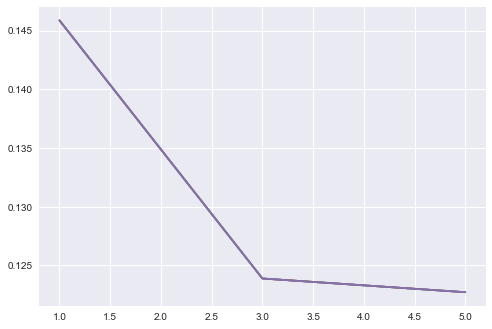

In [134]:
%%timeit
X_train_rm_outlier,y_train_rm=remove_outliers(X_train_delete,y_train_log)
simple_test(X_train_rm_outlier,y_train_rm)

## Normalization 

In [139]:
def normalization_part(df):
    df_train=df.copy()
    df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
    #create column for new variable (one is enough because it's a binary categorical feature)
    #if area>0 it gets 1, for area==0 it gets 0
    df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
    df_train['HasBsmt'] = 0 
    df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
    df_train['HasBsmt'].value_counts()
    #transform data with non-zero observations
    df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
    return df_train

1 loop, best of 3: 19.3 s per loop


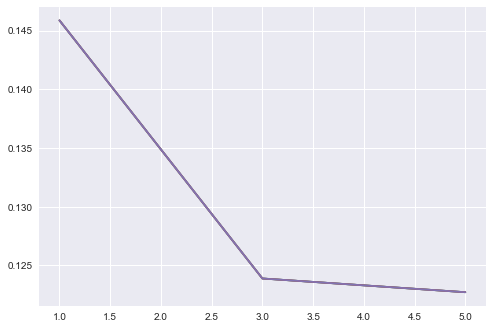

In [146]:
%%timeit
X_train_normal=normalization_part(X_train_delete)
X_train_normalrm,y_train_normalrm=remove_outliers(X_train_normal,y_train_log)
simple_test(X_train_normalrm,y_train_normalrm)

Other data cleaning techniques: standarization, sampling, interpolation, etc. 